In [19]:
import numpy as np
import pandas as pd
r_values = np.random.uniform(1, 40, 1000)

In [20]:
len(r_values)

1000

In [21]:
u_values = [1/i for i in r_values]

In [22]:
shgc_values = np.clip(np.random.normal(0.3, 0.1, 1000), 0, 0.6)

In [23]:
wwr_values = np.random.uniform(0,0.6,1000)

In [24]:
window_num = np.random.randint(0,15,1000)

In [25]:
sc_min = 0.35
sc_max = 0.7
sc_values = np.random.uniform(sc_min, sc_max, 1000)



In [29]:
import numpy as np

climate_zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Zone 8']

probabilities = [0.05, 0.20, 0.15, 0.15, 0.25, 0.10, 0.05, 0.05]

random_climate_zones = np.random.choice(climate_zones, 1000, p=probabilities)

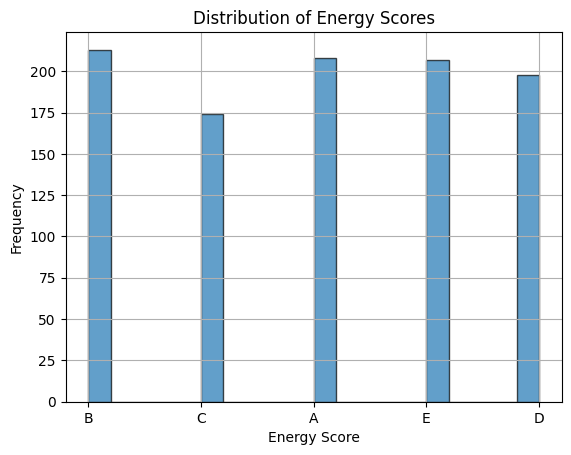

In [70]:
import numpy as np
import matplotlib.pyplot as plt


plt.hist(data["Energy_Rating"], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Energy Scores')
plt.xlabel('Energy Score')
plt.ylabel('Frequency')
plt.grid(True)

# 显示图表
plt.show()


In [64]:
import random
def calculate_energy_score(u, shgc, wwr, window_num, sc, climate_zone):
    score = 0
    score += (1 / u) * 0.4
    if climate_zone in ['Zone 1', 'Zone 2', 'Zone 3']:
        score += (1 - shgc) * 0.2
    else:
        score += shgc * 0.2 
    score += (1 - wwr) * 0.1
    score += (1 / window_num) * 0.1
    score += (1 - sc) * 0.2
    if score > 100:
        score = random.randint(1, 100)
    return score
energy_scores = [calculate_energy_score(u, shgc, wwr, window, sc, zone)
                 for u, shgc, wwr, window, sc, zone in zip(u_values, shgc_values, wwr_values, window_num, sc_values, random_climate_zones)]

def score_to_rating(score):
    if score > 0.8:
        return 'A'
    elif score > 0.6:
        return 'B'
    elif score > 0.4:
        return 'C'
    elif score > 0.2:
        return 'D'
    else:
        return 'F'

energy_ratings = [score_to_rating(score) for score in energy_scores]

df = pd.DataFrame({
    'U_value': u_values,
    'SHGC_value': shgc_values,
    'WWR_value': wwr_values,
    'Window_Num': window_num,
    'SC_value': sc_values,
    'Climate_Zone': random_climate_zones,
    'Energy_Score': energy_scores,
    'Energy_Rating': energy_ratings
})

    U_value  SHGC_value  WWR_value  Window_Num  SC_value  Climate_Zone  \
0  2.123353    0.234743   0.489698          11  0.496152             8   
1  1.981524    0.325493   0.467486          17  0.569917             6   
2  4.830145    0.633332   0.569683           4  0.268770             3   
3  3.116825    0.730655   0.599659          16  0.778715             7   
4  4.534847    0.416496   0.478571          17  0.277962             7   
5  2.831032    0.211346   0.445446           8  0.897567             8   
6  4.150219    0.239358   0.476536          12  0.585315             6   
7  4.402815    0.643583   0.315479          16  0.354661             5   
8  4.831142    0.617443   0.365526          17  0.594093             8   
9  1.708513    0.605050   0.478905           8  0.167014             1   

   Cluster Energy_Rating  
0        1             B  
1        2             C  
2        0             A  
3        0             A  
4        1             B  
5        1             

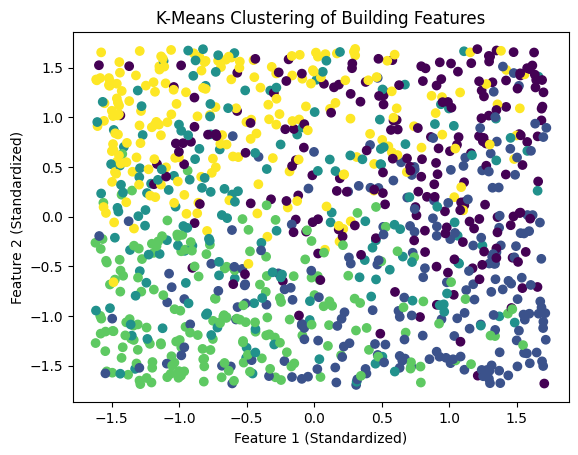

In [67]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# u_values, shgc_values, wwr_values, window_num, sc_values, climate_zones（已经编码为数值）
data = pd.DataFrame({
    'U_value': u_values,
    'SHGC_value': shgc_values,
    'WWR_value': wwr_values,
    'Window_Num': window_num,
    'SC_value': sc_values
})

climate_zone_mapping = {'Zone 1': 1, 'Zone 2': 2, 'Zone 3': 3, 'Zone 4': 4,
                        'Zone 5': 5, 'Zone 6': 6, 'Zone 7': 7, 'Zone 8': 8}
data['Climate_Zone'] = [climate_zone_mapping[zone] for zone in climate_zones]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters

cluster_to_label = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4:'E', 5:'F'}
data['Energy_Rating'] = data['Cluster'].map(cluster_to_label)

print(data.head(10))

print(data['Energy_Rating'].value_counts())

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Building Features')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

In [71]:
data.to_csv("house.csv")